In [1]:
import numpy as np
import mne
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing


import random
from openTSNE import TSNE

plt.style.use('default')

random.seed(123)

In [57]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), bbox_to_anchor=(1.04, 1), loc = "upper left", fontsize=15)

In [2]:
df = pd.read_excel('output.xlsx', index_col=0)
patientlist = []
colorslist = []

person_number = np.sort(df["patient_number"].to_numpy())

patient = ['chb01', 'chb02','chb03','chb04','chb05','chb06','chb07','chb08','chb09',
         'chb10', 'chb11','chb12','chb13','chb14','chb15','chb16','chb17','chb18',
         'chb19','chb20', 'chb21', 'chb22','chb23']

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'deeppink', 'powderblue','darkorange','gray','aquamarine','lawngreen', 'peru', 'cornflowerblue', 'lightpink', 'darkblue', 'palegreen', 'peachpuff', 
          'burlywood', 'rosybrown', 'darkgray', 'black']


for i in range(len(patient)):
    for j in range(sum(df['patient']==patient[i])*18):
        colorslist.append(colors[i])
        patientlist.append(patient[i])
        
(unique, counts) = np.unique(person_number, return_counts=True)
unique, counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]),
 array([20,  3,  7,  4,  5, 10,  3,  5,  4,  7,  3, 27, 12,  8, 20, 10,  3,
         6,  3,  8,  4,  3,  7]))

In [3]:
ictal = np.load('ictal_feature.npy')
interictal = np.load('interictal_feature.npy')

In [223]:
np.shape(interictal)

(182, 18, 42)

# Reshaped

(182, 756) (182, 756)


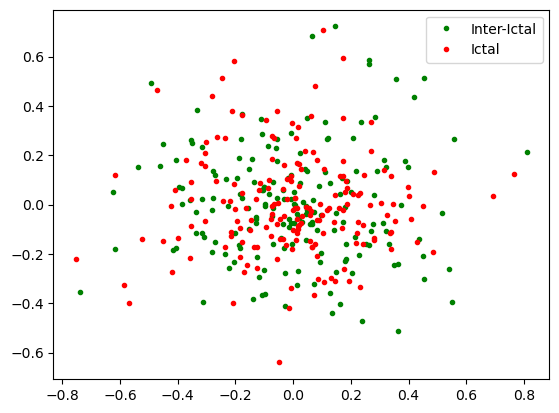

In [4]:
ictal_reshaped = np.reshape(ictal, [np.shape(ictal)[0],np.shape(ictal)[1]*np.shape(interictal)[2]])
interictal_reshaped = np.reshape(interictal, [np.shape(interictal)[0],np.shape(interictal)[1]*np.shape(interictal)[2]])
print(np.shape(ictal_reshaped), np.shape(interictal_reshaped))

pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

pca_interictal = (pca.fit_transform(preprocessing.normalize(interictal_reshaped)))
pca_ictal = (pca.fit_transform(preprocessing.normalize(ictal_reshaped)))

x1.append(pca_interictal[:,0])
x2.append(pca_interictal[:,1])
x3.append(pca_ictal[:,0])
x4.append(pca_ictal[:,1])

plt.figure()
for i in range(len(x1)):
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")


plt.legend()
plt.show()

# Concatenated vectors

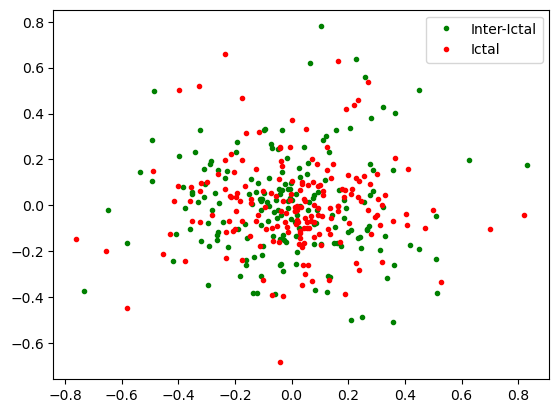

In [5]:
overall_pca_vecs = np.concatenate((interictal_reshaped, ictal_reshaped))

pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

pca_overall = (pca.fit_transform(preprocessing.normalize(overall_pca_vecs)))

x1.append(pca_overall[0:181,0])
x2.append(pca_overall[0:181,1])
x3.append(pca_overall[182:364,0])
x4.append(pca_overall[182:364,1])

plt.figure()
for i in range(len(x1)):
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")


plt.legend()
plt.show()

# no reshape - 

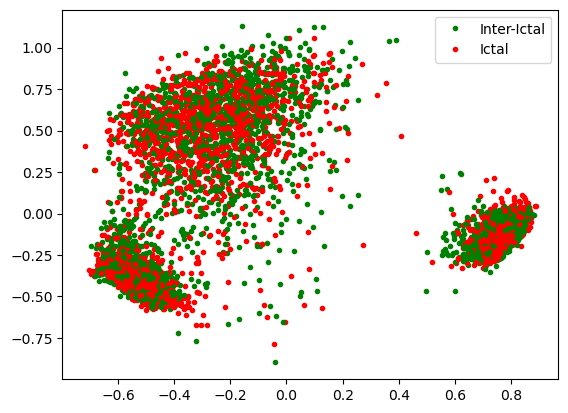

In [6]:
ictal = np.load('ictal_feature.npy')
interictal = np.load('interictal_feature.npy')

pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

for i in range(np.shape(ictal)[0]):
    a = pca.fit_transform(preprocessing.normalize(ictal[i]))
    pca_ictal.append(a)
    x3.append(a[:,0])
    x4.append(a[:,1])
    
for j in range(np.shape(interictal)[0]):
    b = pca.fit_transform(preprocessing.normalize(interictal[j]))
    pca_interictal.append(b)
    x1.append(b[:,0])
    x2.append(b[:,1])



plt.figure()
for i in range(len(x1)):
    #plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal')
    #plt.plot(x3[i], x4[i], '.', label = 'Ictal')
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="green")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "red")
    plt.legend()


plt.show()


# is this the same as the above?

(3276, 42) (3276, 42)


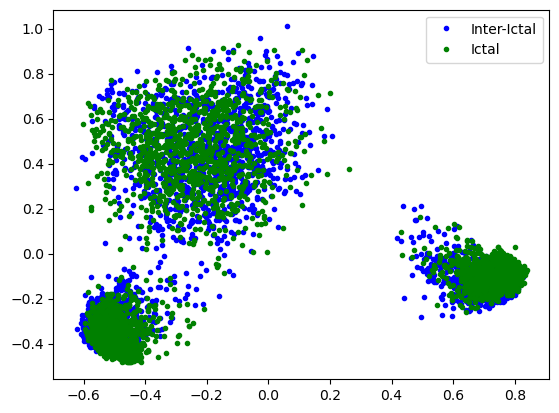

In [7]:
ictal_reshaped = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshaped = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])
print(np.shape(ictal_reshaped), np.shape(interictal_reshaped))

pca_interictal = []
pca_ictal = []
x1 = []
x2 = []
x3 = []
x4 = []

pca = PCA(n_components=2)

pca_interictal = (pca.fit_transform(preprocessing.normalize(interictal_reshaped)))
pca_ictal = (pca.fit_transform(preprocessing.normalize(ictal_reshaped)))

x1.append(pca_interictal[:,0])
x2.append(pca_interictal[:,1])
x3.append(pca_ictal[:,0])
x4.append(pca_ictal[:,1])

plt.figure()
for i in range(len(x1)):
    plt.plot(x1[i], x2[i], '.',label = 'Inter-Ictal' if i == 0 else "", color="blue")
    plt.plot(x3[i], x4[i], '.', label = 'Ictal' if i == 0 else "", color = "green")


plt.legend()
plt.show()

In [8]:
np.shape(interictal), np.shape(ictal)

((182, 18, 42), (182, 18, 42))

# vector shape (182*18, 42)

In [67]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=60, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=60, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)


--------------------------------------------------------------------------------
TSNE(n_jobs=8, perplexity=60, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 180 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.51 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.28 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=273.00 for 250 iterations...
Iteration   50, KL divergence 2.9021, 50 iterations in 1.0750 sec
Iteration  100, KL divergence 2.5893, 50 iterations in 1.0275 sec
Iteration  150, KL divergence 2.5269, 50 iterations in 0.9462 sec
Iteration  200, KL divergence 2.5014, 50 iterations in 0.9138 sec
Iteration  250, KL divergence 2.4885, 50 iterations in 0.8708 sec
   --> Time elapsed: 4.83 seconds
===> Running optimization with exaggeration=1.00, lr

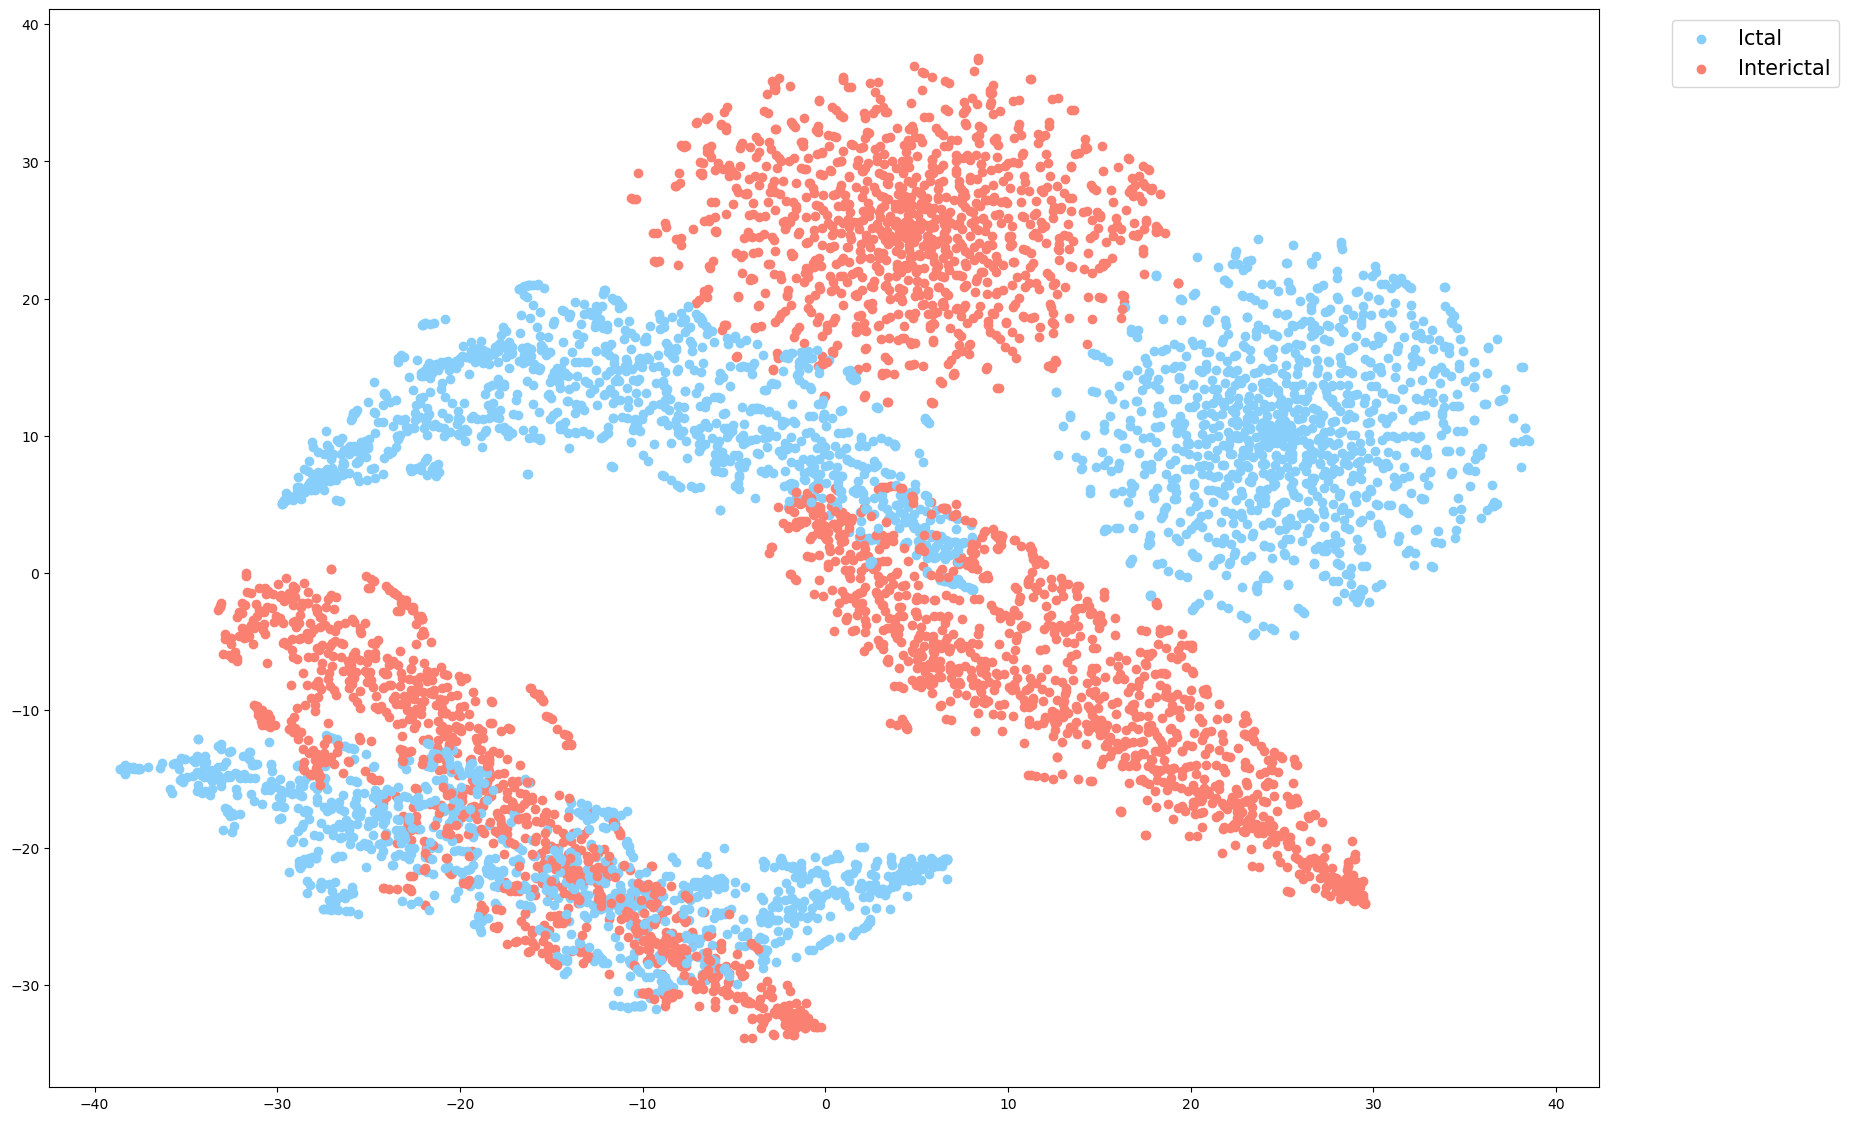

In [68]:
fig, ax = plt.subplots(figsize=(20, 14))
for i in range(182*18):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "lightskyblue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "salmon", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

--------------------------------------------------------------------------------
TSNE(n_jobs=8, perplexity=75, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 225 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.67 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.36 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.06 seconds
===> Running optimization with exaggeration=12.00, lr=273.00 for 250 iterations...
Iteration   50, KL divergence 2.7402, 50 iterations in 1.1318 sec
Iteration  100, KL divergence 2.4598, 50 iterations in 1.0596 sec
Iteration  150, KL divergence 2.4110, 50 iterations in 0.9254 sec
Iteration  200, KL divergence 2.3946, 50 iterations in 0.8852 sec
Iteration  250, KL divergence 2.3876, 50 iterations in 0.9079 sec
   --> Time elapsed: 4.91 seconds
===> Running optimization with exaggeration=1.00, lr

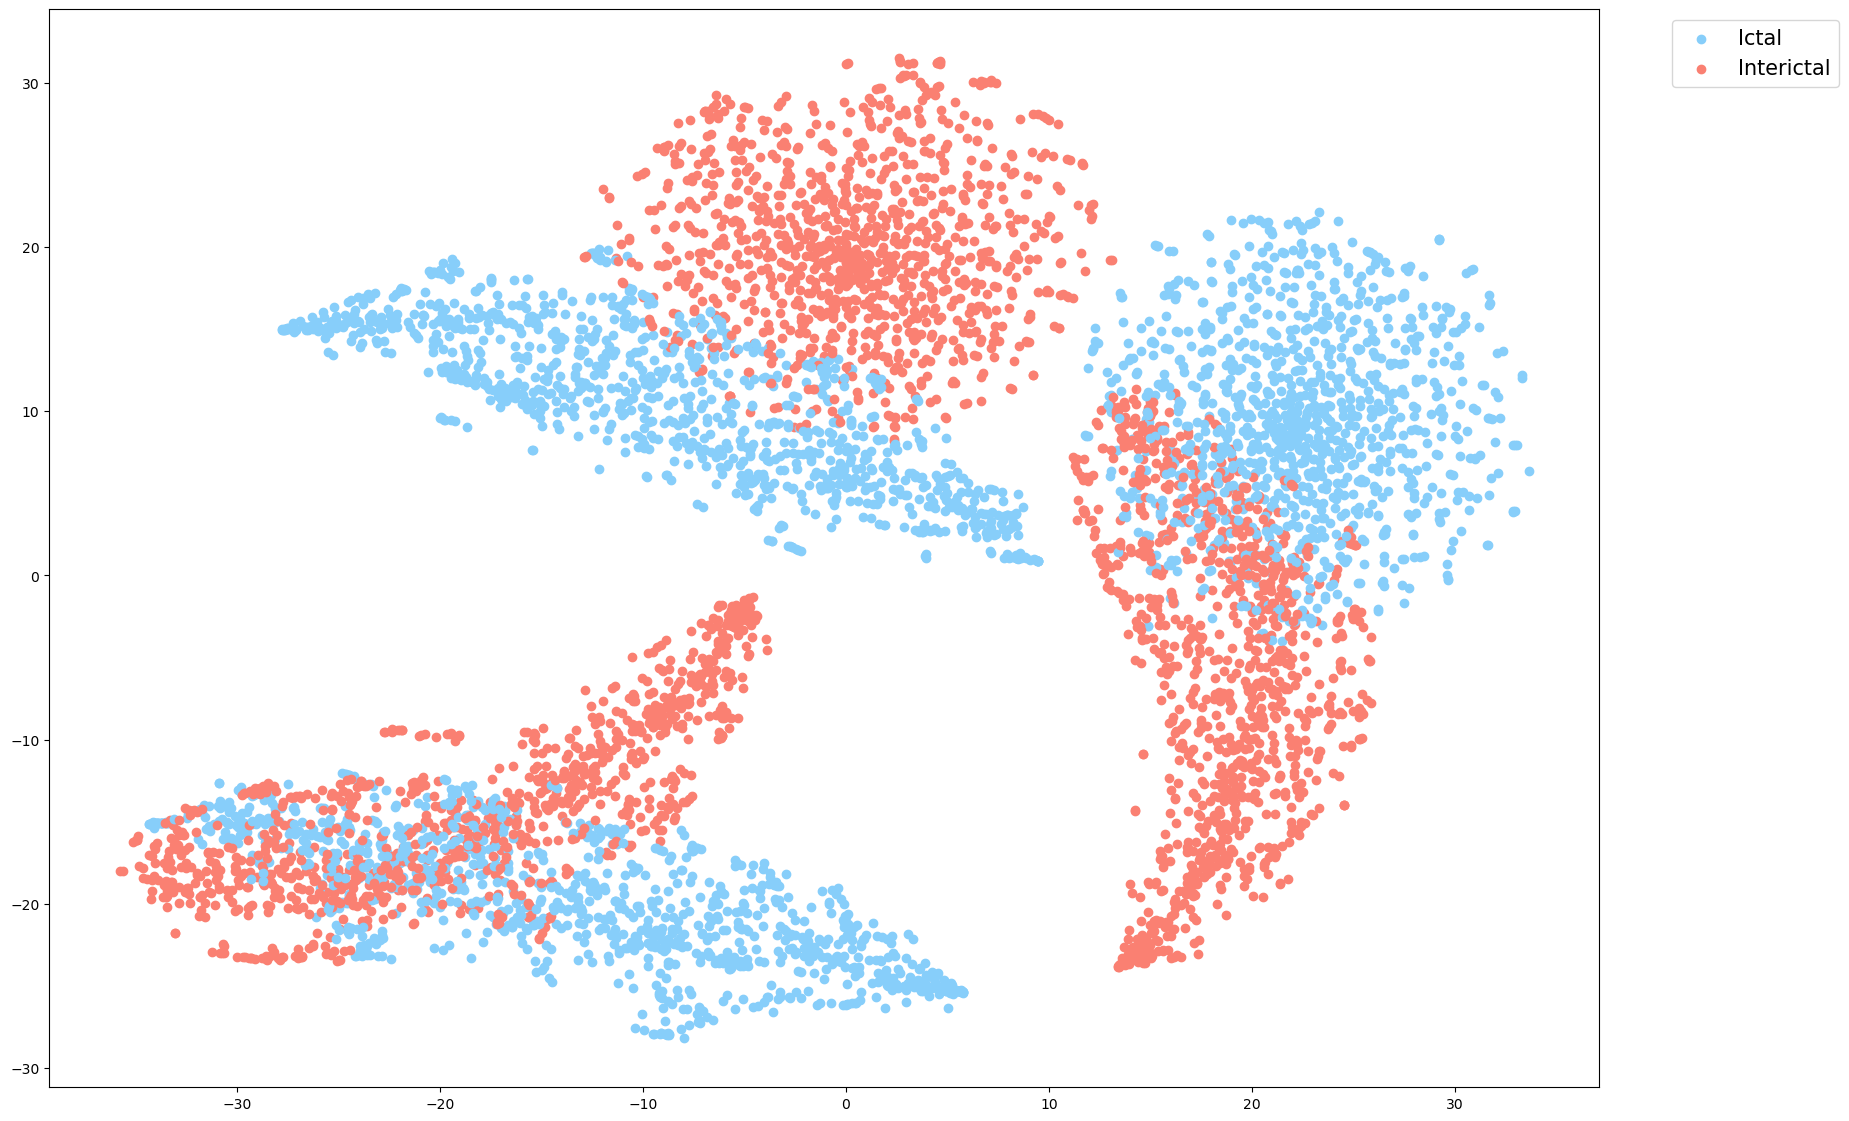

In [66]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=75, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=75, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)

fig, ax = plt.subplots(figsize=(20, 14))
for i in range(182*18):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "lightskyblue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "salmon", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

In [69]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=50, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=50, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)

fig, ax = plt.subplots(figsize=(20, 14))
for i in range(182*18):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "lightskyblue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "salmon", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

--------------------------------------------------------------------------------
TSNE(n_jobs=8, perplexity=50, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.57 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.22 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=273.00 for 250 iterations...
Iteration   50, KL divergence 3.0527, 50 iterations in 1.0592 sec
Iteration  100, KL divergence 2.7126, 50 iterations in 0.9923 sec
Iteration  150, KL divergence 2.6429, 50 iterations in 0.8668 sec
Iteration  200, KL divergence 2.6147, 50 iterations in 0.9235 sec
Iteration  250, KL divergence 2.5986, 50 iterations in 0.8903 sec
   --> Time elapsed: 4.73 seconds
===> Running optimization with exaggeration=1.00, lr

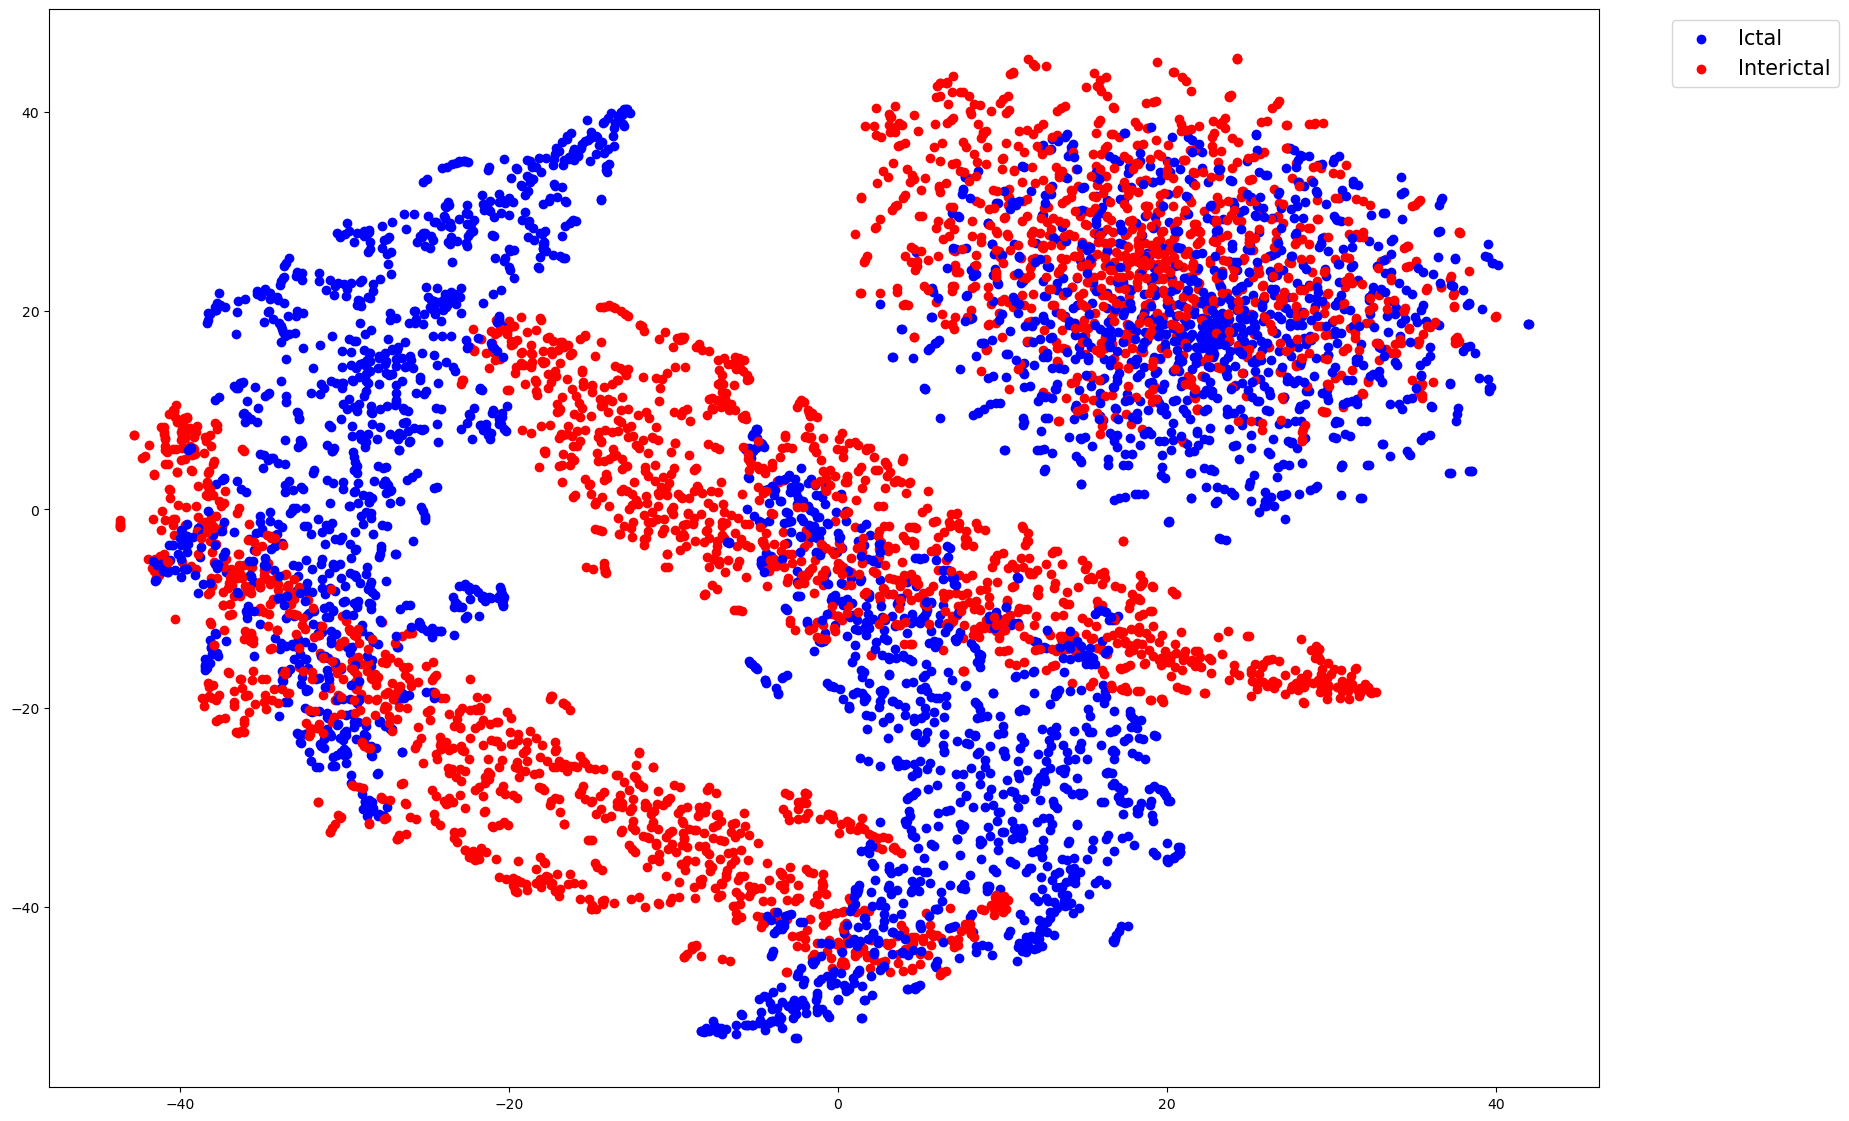

In [64]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0]*np.shape(ictal)[1],np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0]*np.shape(interictal)[1],np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)

fig, ax = plt.subplots(figsize=(20, 14))
for i in range(182*18):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "blue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "red", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

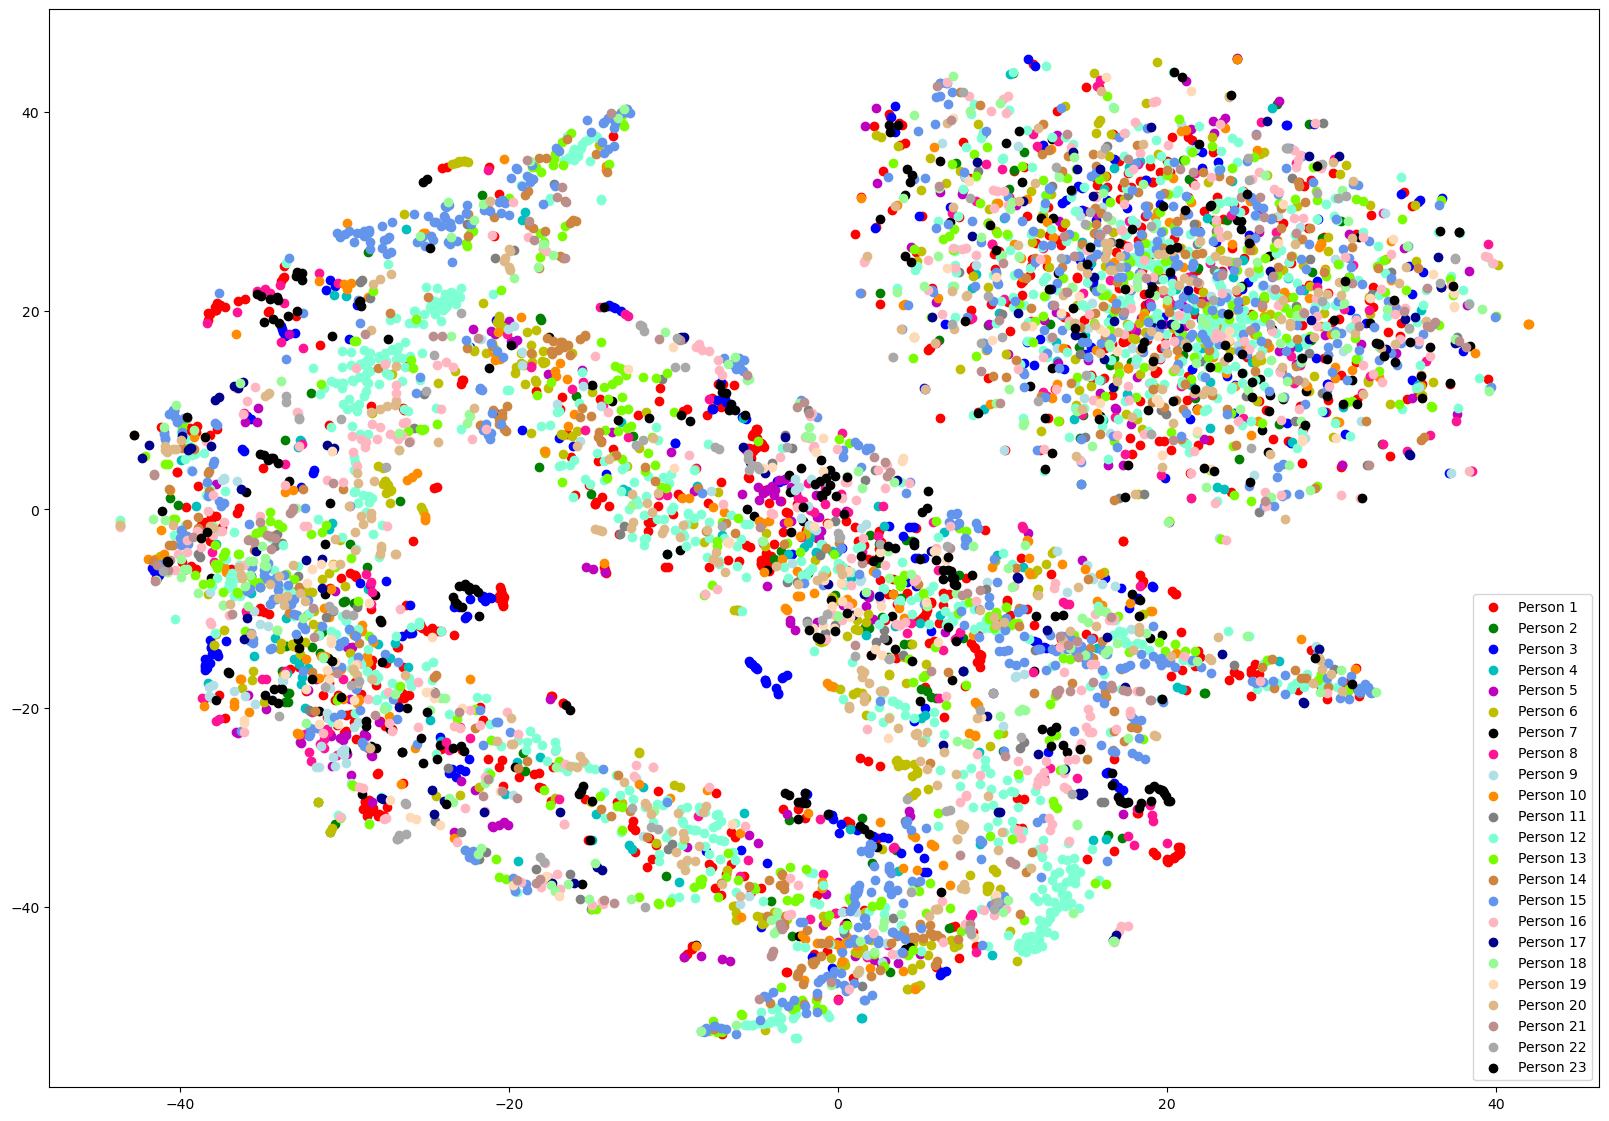

In [58]:
fig, ax = plt.subplots(figsize=(20, 14))
counts2 = counts*18
abxd = 0

for i in range(len(unique)):
    for count in range(counts2[i]): 
        ax.scatter(tsne_comps1[count+abxd, 0], tsne_comps1[count+abxd, 1],
                c = colors[i], label = f"Person {unique[i]}")
        
        ax.scatter(tsne_comps2[count+abxd, 0], tsne_comps2[count+abxd, 1],
                c = colors[i], label = f"Person {unique[i]}")
        
    abxd = counts2[i] + abxd


legend_without_duplicate_labels(ax)
plt.show()

# Vectors concatenated


In [11]:
overall_vecs = np.concatenate((ictal_reshape, interictal_reshape))
tsne_comps = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(overall_vecs)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.78 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.27 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=546.00 for 250 iterations...
Iteration   50, KL divergence 4.2917, 50 iterations in 2.1264 sec
Iteration  100, KL divergence 3.7240, 50 iterations in 1.8664 sec
Iteration  150, KL divergence 3.6492, 50 iterations in 2.0116 sec
Iteration  200, KL divergence 3.6190, 50 iterations in 1.8847 sec
Iteration  250, KL divergence 3.6020, 50 iterations in 1.8434 sec
   --> Time elapsed: 9.73 seconds
===> Running optimization with exaggeration=1.00, lr=546.00 for 500 

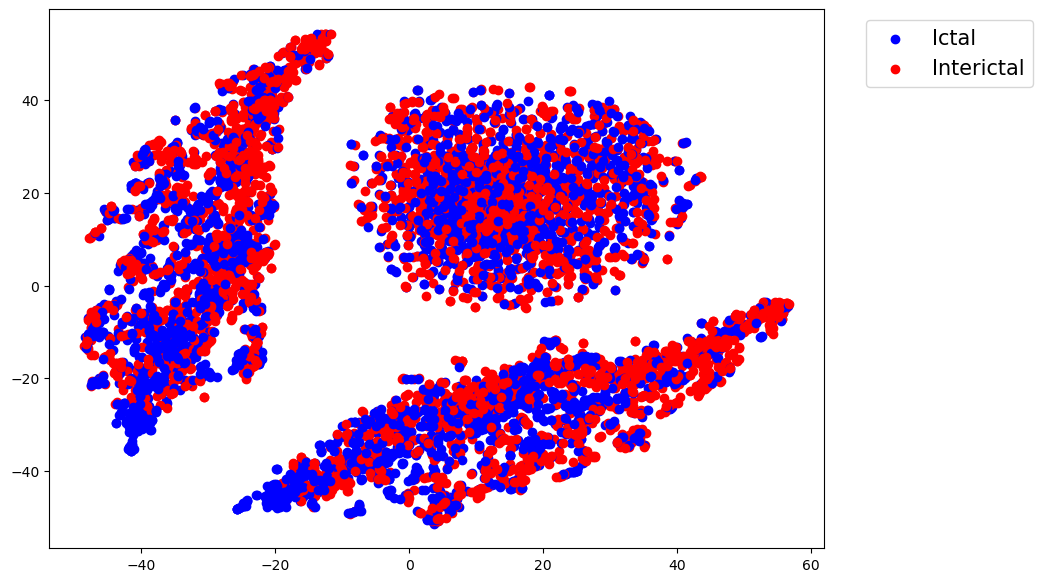

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(3276):
    ax.scatter(tsne_comps[i][0], tsne_comps1[i][1],
               c = "blue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps[i+3276][0], tsne_comps[i+3276][1],
               c = "red", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()

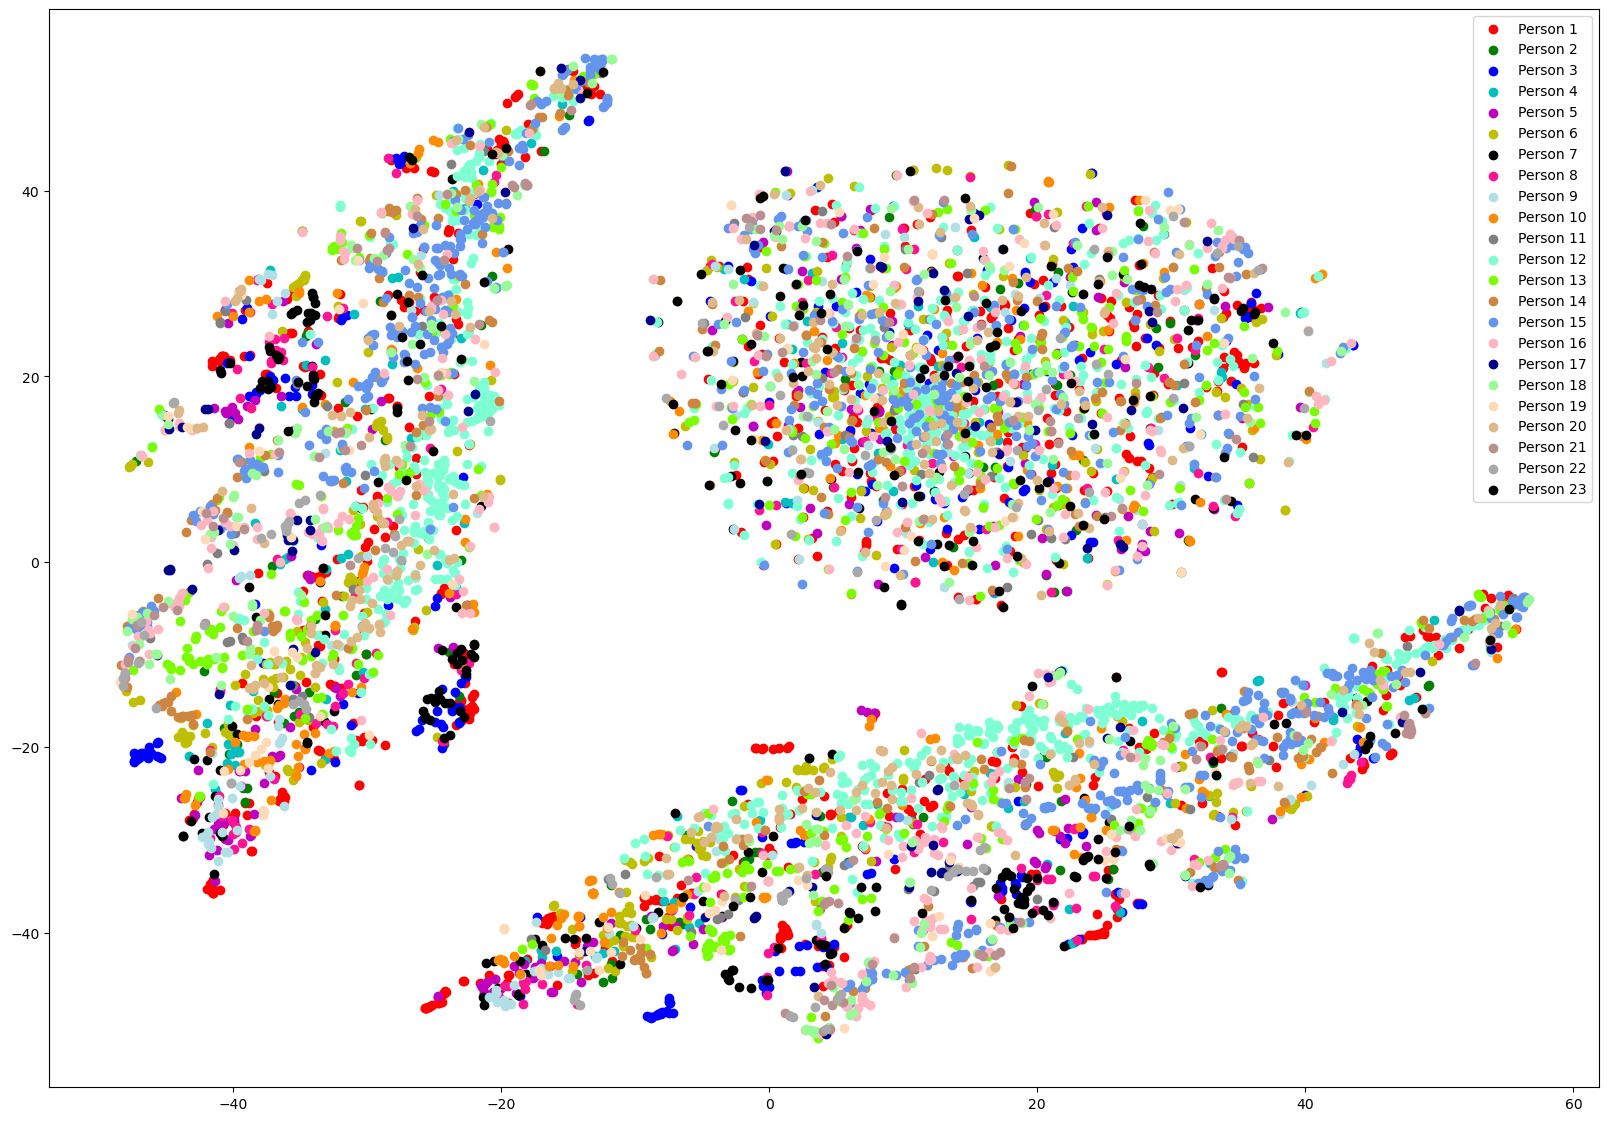

In [56]:
fig, ax = plt.subplots(figsize=(20, 14))
counts2 = counts*18
abxd = 0

for i in range(len(unique)):
    for count in range(counts2[i]): 
        ax.scatter(tsne_comps[count+abxd, 0], tsne_comps[count+abxd, 1],
                c = colors[i], label = f"Person {unique[i]}")
        
        ax.scatter(tsne_comps[3276+count+abxd, 0], tsne_comps[3276+count+abxd, 1],
                c = colors[i], label = f"Person {unique[i]}")
        
    abxd = counts2[i] + abxd


legend_without_duplicate_labels(ax)
plt.show()

# Vector Shape (182, 18*36)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=123, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 2.2527, 50 iterations in 0.0571 sec
Iteration  100, KL divergence 1.9612, 50 iterations in 0.0529 sec
Iteration  150, KL divergence 2.1518, 50 iterations in 0.0403 sec
Iteration  200, KL divergence 2.1010, 50 iterations in 0.0387 sec
Iteration  250, KL divergence 1.9493, 50 iterations in 0.0348 sec
   --> Time elapsed: 0.22 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 500 iterations..

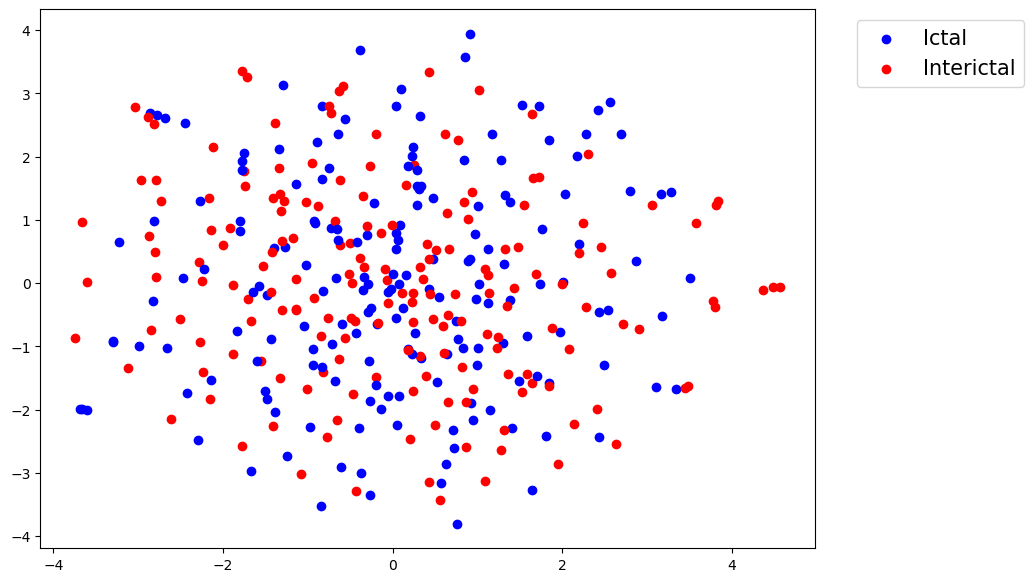

In [ ]:
ictal_reshape = np.reshape(ictal, [np.shape(ictal)[0],np.shape(ictal)[1]*np.shape(interictal)[2]])
interictal_reshape = np.reshape(interictal, [np.shape(interictal)[0],np.shape(interictal)[1]*np.shape(interictal)[2]])

tsne_comps1 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(ictal_reshape)
tsne_comps2 = TSNE(n_components=2, perplexity=30, verbose=True, n_jobs=8,random_state=123).fit(interictal_reshape)

fig, ax = plt.subplots(figsize=(10, 7))

for i in range(len(tsne_comps1)):
    ax.scatter(tsne_comps1[i][0], tsne_comps1[i][1],
               c = "blue", label = "Ictal" if i == 0 else "")
    ax.scatter(tsne_comps2[i][0], tsne_comps2[i][1],
               c = "red", label = "Interictal" if i == 0 else "")
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
plt.show()